#### Feature Manipulation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from IPython.display import display

Now, In Step 2 (Data Cleaning and Preprocessing) I mapped numerical values (nomenclatures) to their categorial values, in Feature Manipulation tho... that doesn't do us any good.
I will map the categories back to their numerical values.

In [3]:
astma = pd.read_csv('../data/asthma_disease_data_cleaned.csv', na_values=[], keep_default_na=False)
pd.set_option('display.max_columns', None)

astma.Gender = astma.Gender.map({'Male': 0, 'Female': 1}).astype('int')
astma.Ethnicity = astma.Ethnicity.map({'Caucasian': 0, 'African American': 1, 'Asian': 2, 'Other': 3}).astype('int')
astma.EducationLevel = astma.EducationLevel.map({'None': 0, 'High School': 1, 'Bachelor''s': 2, 'Higher': 3}).astype('int')

# confert all int columns to float for the regression model
for col in astma.columns:
    if astma[col].dtype == 'int64':
        astma[col] = astma[col].astype('float')

astma

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,63.0,0.0,1.0,0.0,15.848744,0.0,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,1.0,1.0,0.0,0.0,0.0,0.0,1.369051,4.941206,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,26.0,1.0,2.0,2.0,22.757042,0.0,5.897329,6.341014,5.153966,1.969838,7.457665,6.584631,0.0,0.0,1.0,0.0,0.0,0.0,2.197767,1.702393,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2,57.0,0.0,2.0,1.0,18.395396,0.0,6.739367,9.196237,6.840647,1.460593,1.448189,5.445799,0.0,1.0,1.0,0.0,1.0,0.0,1.698011,5.022553,1.0,1.0,1.0,0.0,1.0,1.0,0.0
3,40.0,1.0,2.0,1.0,38.515278,0.0,1.404503,5.826532,4.253036,0.581905,7.571845,3.965316,0.0,0.0,0.0,0.0,1.0,0.0,3.032037,2.300159,1.0,0.0,1.0,1.0,1.0,0.0,0.0
4,61.0,0.0,0.0,3.0,19.283802,0.0,4.604493,3.127048,9.625799,0.980875,3.049807,8.260605,0.0,0.0,0.0,0.0,1.0,0.0,3.470589,3.067944,1.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,43.0,1.0,0.0,2.0,29.059613,0.0,3.019854,6.119637,8.300960,2.483829,7.314582,3.425445,1.0,0.0,1.0,0.0,0.0,0.0,3.125249,5.166032,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2388,18.0,1.0,0.0,1.0,20.740850,0.0,5.805180,4.386992,7.731192,7.733983,2.279073,6.467701,0.0,0.0,0.0,1.0,0.0,0.0,1.132977,5.509502,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2389,54.0,0.0,3.0,2.0,37.079560,0.0,4.735169,8.214064,7.483521,2.794847,3.055139,9.484013,0.0,0.0,0.0,0.0,1.0,0.0,1.685962,3.346877,1.0,0.0,1.0,1.0,0.0,1.0,1.0
2390,46.0,1.0,0.0,2.0,23.444712,0.0,9.672637,7.362861,6.717272,9.448862,7.712584,5.051405,0.0,1.0,1.0,0.0,0.0,1.0,3.481549,1.713274,0.0,1.0,1.0,0.0,1.0,1.0,0.0


In [4]:
# Check missing data once again just in case
astma.isnull().sum()

# Check if all values are numerical so far
astma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     2392 non-null   float64
 1   Gender                  2392 non-null   float64
 2   Ethnicity               2392 non-null   float64
 3   EducationLevel          2392 non-null   float64
 4   BMI                     2392 non-null   float64
 5   Smoking                 2392 non-null   float64
 6   PhysicalActivity        2392 non-null   float64
 7   DietQuality             2392 non-null   float64
 8   SleepQuality            2392 non-null   float64
 9   PollutionExposure       2392 non-null   float64
 10  PollenExposure          2392 non-null   float64
 11  DustExposure            2392 non-null   float64
 12  PetAllergy              2392 non-null   float64
 13  FamilyHistoryAsthma     2392 non-null   float64
 14  HistoryOfAllergies      2392 non-null   

In [5]:
# I will create a column 'Total Exposure' combining the exposure to all 3 environments in the dataset.
astma['TotalExposure'] = astma.PollenExposure + astma.PollutionExposure + astma.DustExposure

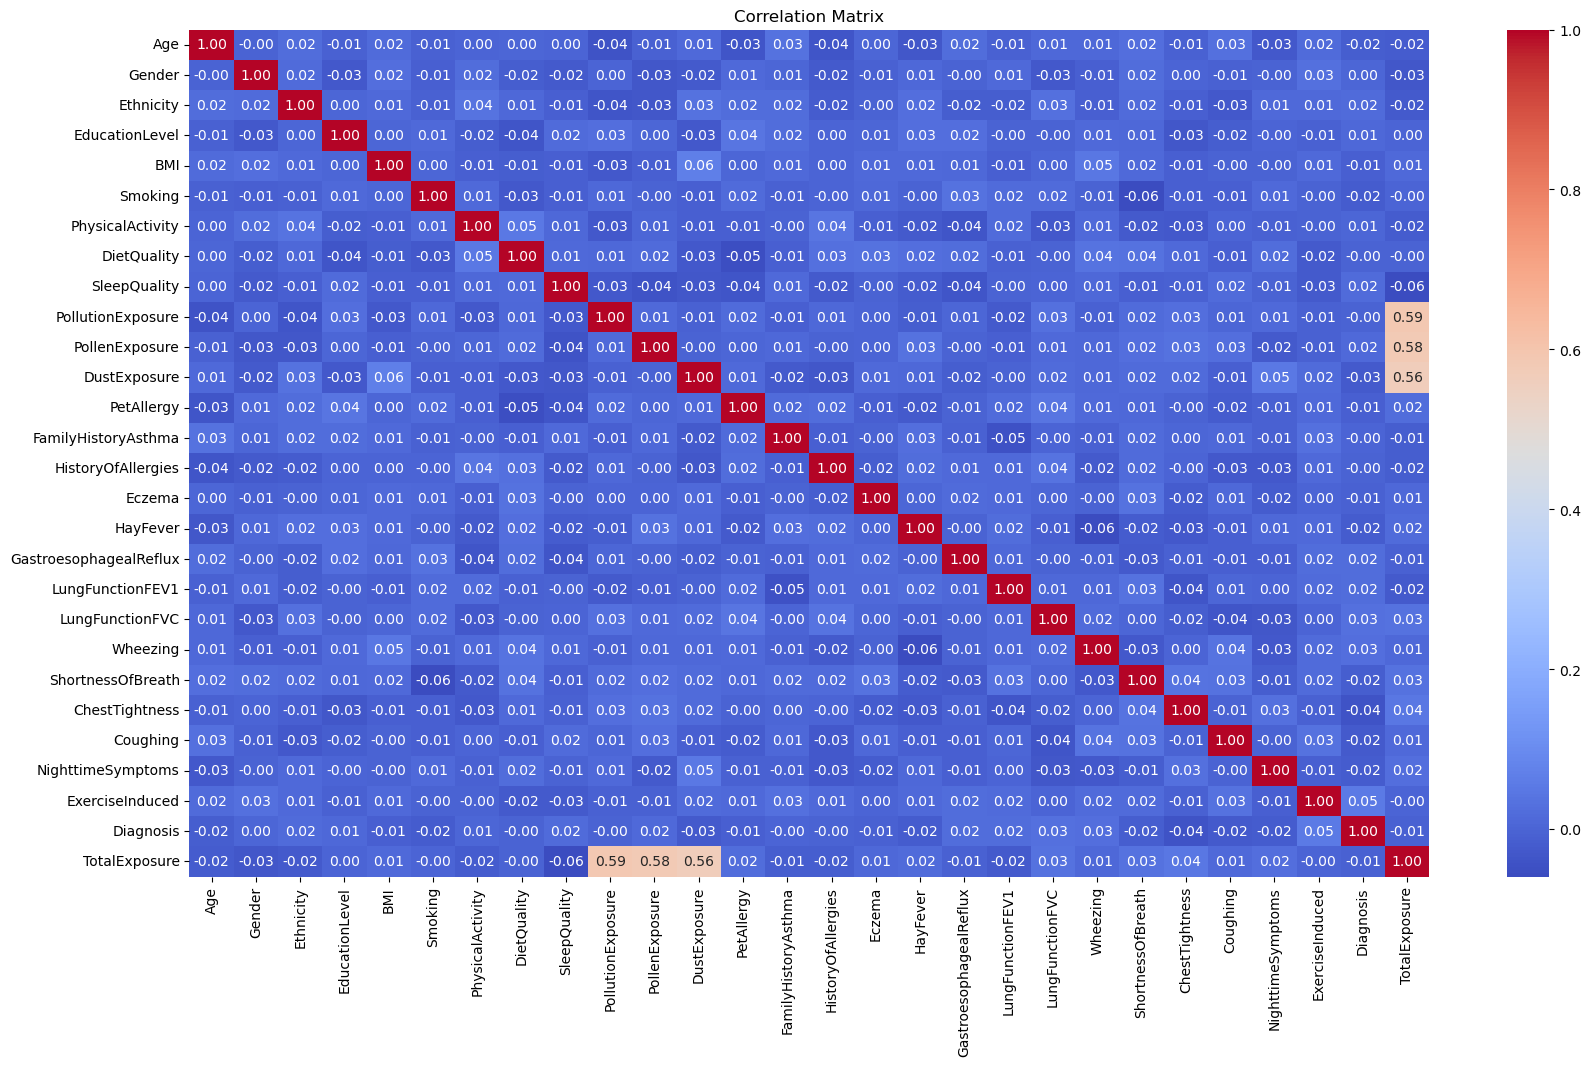

In [6]:
# I already checked the correlation between features in '1. Data Exploration.ipynb' but now we have a new field and it won't hurt to see.
# And of course the correlation between Exposures and Total exposure is very high.
plt.figure(figsize=(20, 11))
sns.heatmap(astma.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### For now I think this data is good enough to continue on. Let's do some hypothesis testing then...

In [7]:
# Let's check if smoking affects FEV1.

# H0 -> smoking does not affect FEV1
# H1 -> smoking does affect FEV1

group_smoking = astma[astma['Smoking'] == 1]['LungFunctionFEV1']
group_nonsmoking = astma[astma['Smoking'] == 0]['LungFunctionFEV1']

t_stat, p_val = stats.ttest_ind(group_smoking, group_nonsmoking)
print(f"T-test p-value: {p_val}")

# p-value = 0.44 -> > 0.05  -> we cannot reject the null hypothesis, meaning smoking might not affect FEV1.

T-test p-value: 0.4463473135222098


In [8]:
# Let's check if the Total Exposure to Pollution, Pollen and Dust affects Coughing

group_coughing = astma[astma.Coughing == 1]['TotalExposure']
group_no_coughing = astma[astma.Coughing == 0]['TotalExposure']

t_stat, p_val = stats.ttest_ind(group_coughing, group_no_coughing)
p_val

# We cannot reject the H0 hypothesis.

np.float64(0.5611852643600497)

In [9]:
# Let's check if Ethnicity affects diagnosis

group_diagnosed = astma[astma.Diagnosis == 1]['Ethnicity']
group_no_diagnosed = astma[astma.Diagnosis == 0]['Ethnicity']

p_stat, p_val = stats.ttest_ind(group_diagnosed, group_no_diagnosed)
p_val

# Nope, we cannot reject H0 so we do not have evidence that it affects diagnosis.

np.float64(0.4025215517106182)

I am getting nowhere with hypothesis testing, maybe my data is not modified enough..
Let's try to fit a logistic regression model.

In [10]:
import statsmodels.api as sm

# Select predictors and target
X = astma[['Gender', 'EducationLevel', 'PetAllergy']]
y = astma['Diagnosis']

# Add constant for intercept
X = sm.add_constant(X)

# Fit logistic regression model
model = sm.Logit(y, X).fit()

# Show summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.203763
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                 2392
Model:                          Logit   Df Residuals:                     2388
Method:                           MLE   Df Model:                            3
Date:                Tue, 12 Aug 2025   Pseudo R-squ.:               0.0006510
Time:                        20:53:33   Log-Likelihood:                -487.40
converged:                       True   LL-Null:                       -487.72
Covariance Type:            nonrobust   LLR p-value:                    0.8884
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.9541      0.194    -15.252      0.000      -3.334      -2.574
Gender           

I will add some more features...

In [ ]:
# Create allergy count feature
astma['MedicalComplicationsCount'] = astma[['FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever', 'GastroesophagealReflux']].sum(axis=1)

astma['SymptomsCount'] = astma[['Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing', 'NighttimeSymptoms']].sum(axis=1)

# I will create one for lifestyle factors but i will need to normalize the values first
scaler = preprocessing.MinMaxScaler()
lifestyle_cols = ['BMI', 'Smoking', 'PhysicalActivity', 'DietQuality', 'SleepQuality']
astma[lifestyle_cols] = scaler.fit_transform(astma[lifestyle_cols])
astma['LifestyleScore'] = astma[lifestyle_cols].mean(axis=1)

# I will also normalize the Lung Functions values
lung_function_cols = ['LungFunctionFEV1', 'LungFunctionFVC', 'TotalExposure']
astma[lung_function_cols] = scaler.fit_transform(astma[lung_function_cols])
astma['LungFunctionScore'] = astma[lung_function_cols].mean(axis=1)

# While I'm at it, I will normalize the exposure columns too
exposure_cols = ['PollutionExposure', 'PollenExposure', 'DustExposure']
astma[exposure_cols] = scaler.fit_transform(astma[exposure_cols])
astma['EnvironmentalExposure'] = astma[exposure_cols].mean(axis=1)

# Maybe this isn't the right move but we will see...

astma

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,TotalExposure,MedicalComplicationsCount,SymptomsCount,LifestyleScore,LungFunctionScore,EnvironmentalExposure
0,63.0,0.0,1.0,0.0,0.032738,0.0,0.089324,0.548738,0.783941,0.738898,0.285523,0.097217,1.0,1.0,0.0,0.0,0.0,0.0,0.122894,0.764809,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.365566,1.0,1.0,0.290948,0.417756,0.373879
1,26.0,1.0,2.0,2.0,0.309582,0.0,0.589909,0.633997,0.192255,0.196922,0.745783,0.658399,0.0,0.0,1.0,0.0,0.0,0.0,0.399201,0.044973,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.546694,1.0,3.0,0.345148,0.330289,0.533701
2,57.0,0.0,2.0,1.0,0.134793,0.0,0.674163,0.919608,0.473612,0.145987,0.144769,0.544485,0.0,1.0,1.0,0.0,1.0,0.0,0.232575,0.782888,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.257359,3.0,4.0,0.440435,0.424274,0.278414
3,40.0,1.0,2.0,1.0,0.941078,0.0,0.140359,0.582532,0.041970,0.058100,0.757202,0.396396,0.0,0.0,0.0,0.0,1.0,0.0,0.677360,0.177828,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.399597,1.0,4.0,0.341188,0.418262,0.403900
4,61.0,0.0,0.0,3.0,0.170395,0.0,0.460548,0.312499,0.938207,0.098005,0.304948,0.826042,0.0,0.0,0.0,0.0,1.0,0.0,0.823580,0.348470,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.406105,1.0,3.0,0.376330,0.526052,0.409665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,43.0,1.0,0.0,2.0,0.562151,0.0,0.301990,0.611852,0.717209,0.248332,0.731473,0.342394,1.0,0.0,1.0,0.0,0.0,0.0,0.708438,0.814777,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.441341,1.0,1.0,0.438640,0.654852,0.440733
2388,18.0,1.0,0.0,1.0,0.228785,0.0,0.580688,0.438533,0.622165,0.773455,0.227867,0.646703,0.0,0.0,0.0,1.0,0.0,0.0,0.044184,0.891114,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.564400,1.0,2.0,0.374034,0.499899,0.549342
2389,54.0,0.0,3.0,2.0,0.883543,0.0,0.473624,0.821360,0.580851,0.279440,0.305482,0.948416,0.0,0.0,0.0,0.0,1.0,0.0,0.228557,0.410464,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.521071,1.0,3.0,0.551876,0.386697,0.511113
2390,46.0,1.0,0.0,2.0,0.337139,0.0,0.967664,0.736213,0.453032,0.944978,0.771278,0.505035,0.0,1.0,1.0,0.0,0.0,1.0,0.827234,0.047391,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.780983,3.0,3.0,0.498810,0.551869,0.740430


In [12]:
# Let's check if SymptomsCount affects diagnosis

group_diagnosed = astma[astma.Diagnosis == 1]['SymptomsCount']
group_no_diagnosed = astma[astma.Diagnosis == 0]['SymptomsCount']

p_stat, p_val = stats.ttest_ind(group_diagnosed, group_no_diagnosed)
p_val

# Okay okay, this  time the p-value was a lot lower than last time, still  not enough to reject H0 but it's close.

np.float64(0.10964806003223919)

In [13]:
# Let's check if MedicalComplicationsCount affects diagnosis

group_diagnosed = astma[astma.Diagnosis == 1]['MedicalComplicationsCount']
group_no_diagnosed = astma[astma.Diagnosis == 0]['MedicalComplicationsCount']

p_stat, p_val = stats.ttest_ind(group_diagnosed, group_no_diagnosed)
p_val

# Unlucky, this one isn't it

np.float64(0.8024610150481892)

In [14]:
# Now let's check the lifestyle scores

group_diagnosed = astma[astma.Diagnosis == 1]['LifestyleScore']
group_no_diagnosed = astma[astma.Diagnosis == 0]['LifestyleScore']

p_stat, p_val = stats.ttest_ind(group_diagnosed, group_no_diagnosed)
p_val

# High p-value again...

np.float64(0.7404183055147397)

In [ ]:
# Now let's check the lifestyle scores

group_diagnosed = astma[astma.Diagnosis == 1]['LungFunctionScore']
group_no_diagnosed = astma[astma.Diagnosis == 0]['LungFunctionScore']

p_stat, p_val = stats.ttest_ind(group_diagnosed, group_no_diagnosed)
p_val

# p-value is low but not low enough, not bad tho.

np.float64(0.1411247679834713)

In [ ]:
# Now let's check the lifestyle scores

group_diagnosed = astma[astma.Diagnosis == 1]['EnvironmentalExposure']
group_no_diagnosed = astma[astma.Diagnosis == 0]['EnvironmentalExposure']

p_stat, p_val = stats.ttest_ind(group_diagnosed, group_no_diagnosed)
p_val

# High p-value...

np.float64(0.6689110862882373)

So far the best indicator has been the count of symptoms.
I would test some more but I don't have much time, I will continue to task 6.

In [16]:
display(astma)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,TotalExposure,MedicalComplicationsCount,SymptomsCount,LifestyleScore,LungFunctionScore
0,63.0,0.0,1.0,0.0,0.032738,0.0,0.089324,0.548738,0.783941,7.388481,2.855578,0.974339,1.0,1.0,0.0,0.0,0.0,0.0,0.122894,0.764809,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.365566,1.0,1.0,0.290948,0.417756
1,26.0,1.0,2.0,2.0,0.309582,0.0,0.589909,0.633997,0.192255,1.969838,7.457665,6.584631,0.0,0.0,1.0,0.0,0.0,0.0,0.399201,0.044973,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.546694,1.0,3.0,0.345148,0.330289
2,57.0,0.0,2.0,1.0,0.134793,0.0,0.674163,0.919608,0.473612,1.460593,1.448189,5.445799,0.0,1.0,1.0,0.0,1.0,0.0,0.232575,0.782888,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.257359,3.0,4.0,0.440435,0.424274
3,40.0,1.0,2.0,1.0,0.941078,0.0,0.140359,0.582532,0.041970,0.581905,7.571845,3.965316,0.0,0.0,0.0,0.0,1.0,0.0,0.677360,0.177828,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.399597,1.0,4.0,0.341188,0.418262
4,61.0,0.0,0.0,3.0,0.170395,0.0,0.460548,0.312499,0.938207,0.980875,3.049807,8.260605,0.0,0.0,0.0,0.0,1.0,0.0,0.823580,0.348470,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.406105,1.0,3.0,0.376330,0.526052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,43.0,1.0,0.0,2.0,0.562151,0.0,0.301990,0.611852,0.717209,2.483829,7.314582,3.425445,1.0,0.0,1.0,0.0,0.0,0.0,0.708438,0.814777,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.441341,1.0,1.0,0.438640,0.654852
2388,18.0,1.0,0.0,1.0,0.228785,0.0,0.580688,0.438533,0.622165,7.733983,2.279073,6.467701,0.0,0.0,0.0,1.0,0.0,0.0,0.044184,0.891114,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.564400,1.0,2.0,0.374034,0.499899
2389,54.0,0.0,3.0,2.0,0.883543,0.0,0.473624,0.821360,0.580851,2.794847,3.055139,9.484013,0.0,0.0,0.0,0.0,1.0,0.0,0.228557,0.410464,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.521071,1.0,3.0,0.551876,0.386697
2390,46.0,1.0,0.0,2.0,0.337139,0.0,0.967664,0.736213,0.453032,9.448862,7.712584,5.051405,0.0,1.0,1.0,0.0,0.0,1.0,0.827234,0.047391,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.780983,3.0,3.0,0.498810,0.551869
